In [17]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB as MB
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train (1).csv


In [132]:
train=pd.read_csv('SalaryData_Train.csv')

In [8]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [147]:
test=pd.read_csv('SalaryData_Test.csv')

In [125]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [133]:
train.duplicated().sum()

3258

In [134]:
train=train.drop_duplicates()

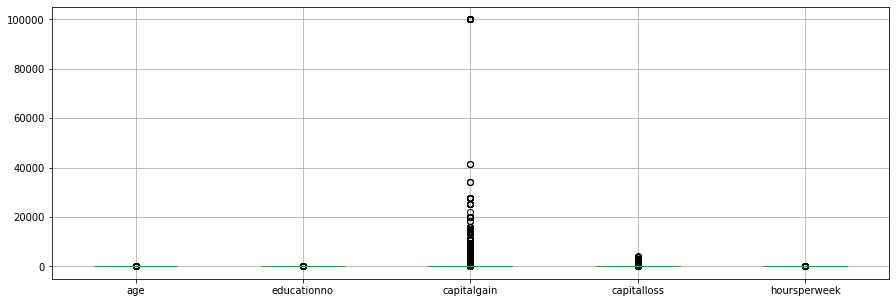

In [135]:
train.boxplot(figsize=(15,5))

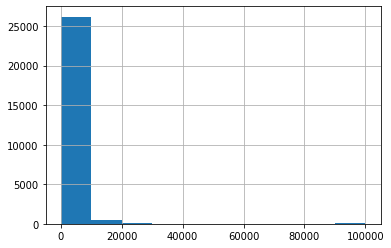

In [136]:
train['capitalgain'].hist()

In [137]:
#train=train.drop('capitalgain',axis=1)

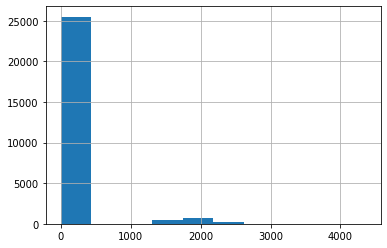

In [138]:
train['capitalloss'].hist()

In [139]:
train.shape

(26903, 14)

In [140]:
label_encoder=preprocessing.LabelEncoder()
train['workclass']=label_encoder.fit_transform(train['workclass'])
train['maritalstatus']=label_encoder.fit_transform(train['maritalstatus'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['relationship']=label_encoder.fit_transform(train['relationship'])
train['race']=label_encoder.fit_transform(train['race'])
train['sex']=label_encoder.fit_transform(train['sex'])
train['native']=label_encoder.fit_transform(train['native'])
train['Salary']=label_encoder.fit_transform(train['Salary'])

In [141]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0


In [142]:
train=train.drop(['education'],axis=1)

In [143]:
train['Salary'].value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

In [69]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [150]:
test.duplicated().sum()

930

In [151]:
test=test.drop_duplicates()

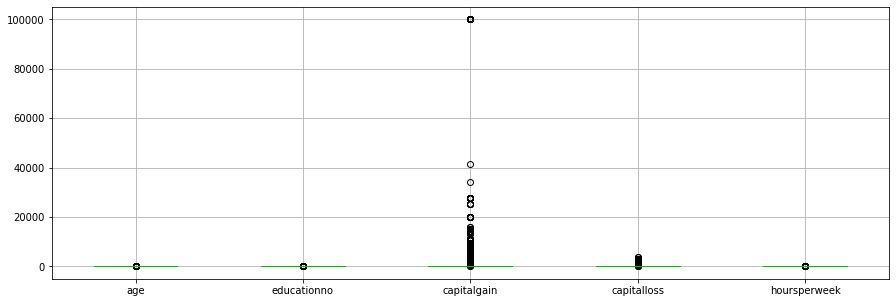

In [152]:
test.boxplot(figsize=(15,5))

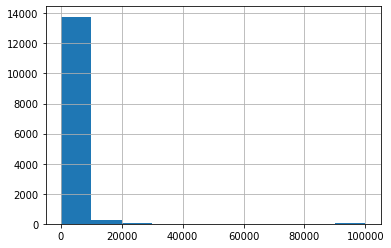

In [153]:
test['capitalgain'].hist()

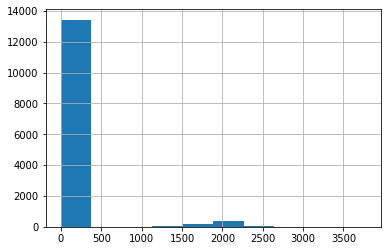

In [154]:
test['capitalloss'].hist()

In [155]:
test.shape

(14130, 14)

In [156]:
label_encoder=preprocessing.LabelEncoder()
test['workclass']=label_encoder.fit_transform(test['workclass'])
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']=label_encoder.fit_transform(test['relationship'])
test['race']=label_encoder.fit_transform(test['race'])
test['sex']=label_encoder.fit_transform(test['sex'])
test['native']=label_encoder.fit_transform(test['native'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

In [157]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0


In [158]:
test=test.drop('education',axis=1)

In [159]:
train.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [160]:
test.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [161]:
x_train=train.iloc[:,:-1]
y_train=train['Salary']

In [163]:
x_test=test.iloc[:,:-1]
y_test=test['Salary']

In [164]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

train_pred= classifier_mb.predict(x_train)
accuracy_train= np.mean(train_pred==y_train)

In [165]:
accuracy_train

0.7683158012117608

In [166]:
test_pred= classifier_mb.predict(x_test)
accuracy_test= np.mean(test_pred==y_test)

In [167]:
accuracy_test

0.7733899504600141